## Imports

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score
from imblearn.over_sampling import SMOTENC
import warnings
import PySimpleGUI as sg
warnings.filterwarnings('ignore')
from joblib import dump, load

ModuleNotFoundError: No module named 'imblearn'

## Data Reading

In [212]:
df=pd.read_excel('Adult Census Income_Dataset.xlsx')                                                                                                                

In [213]:
df.to_csv('Adult Income New.csv')

In [214]:
df=pd.read_csv('Adult Income New.csv')

## Data Exploration

In [215]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education.num   32561 non-null  int64 
 6   marital.status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital.gain    32561 non-null  int64 
 12  capital.loss    32561 non-null  int64 
 13  hours.per.week  32561 non-null  int64 
 14  native.country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [217]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,32561.0,16280.000000,9399.695394,0.0,8140.0,16280.0,24420.0,32560.0
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [218]:
print('Number of rows:', df.shape[0])

Number of rows: 32561


In [219]:
print('Number of columns:', df.shape[1])

Number of columns: 16


In [220]:
df['income']=df['income'].map({"<=50K":0,">50K":1})

<Axes: xlabel='income', ylabel='count'>

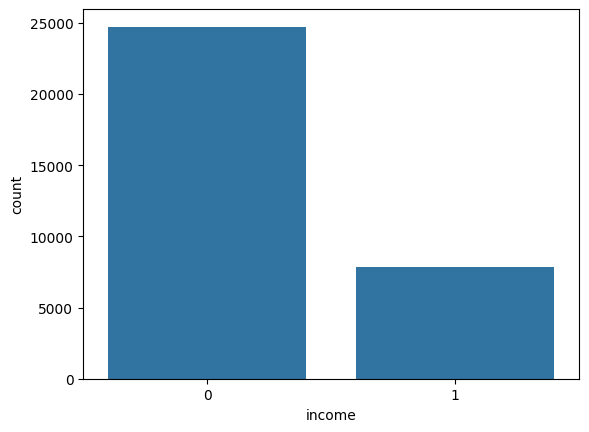

In [221]:
sns.countplot(x='income',data=df)

## Data Pre-Proccessing

### Duplicates

In [222]:
df.duplicated().sum()

0

### Clipping Outliers

In [ ]:
sns.boxplot(data = df, y = 'age')
a = df['age']
Q1 = np.percentile(a, 25)
Q3 = np.percentile(a, 75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
# Find the outliers
outliers = a[(a < lower_bound) | (a > upper_bound)]
print("Outliers:\n", outliers)
print(len(outliers))
print(len(outliers)/df.shape[0] *100 )

In [ ]:
df[df['age'] > upper_bound]['income'].value_counts()

In [ ]:
df[df['age']< lower_bound]['income'].value_counts()

In [ ]:
df['age'] = np.clip(df['age'], lower_bound, upper_bound)

### Missing Data

In [223]:
columns=df.columns
df[columns]=df.replace('?',np.nan)

In [224]:
100*(df.isnull().sum()/len(df))

Unnamed: 0        0.000000
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [225]:
mode_nativecountry=df['native.country'].mode()[0]

In [226]:
df['workclass']=df['workclass'].fillna('Unemployed')
df['occupation']=df['occupation'].fillna('None')
df['native.country']=df['native.country'].fillna(mode_nativecountry)

In [227]:
df.isnull().sum()

Unnamed: 0        0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [228]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,Unemployed,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,0
1,1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,2,66,Unemployed,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,0
3,3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [229]:
df=df.drop("Unnamed: 0",axis=1)

In [230]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [231]:
df.corr(numeric_only=True)['income'].sort_values(ascending=False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
capital.loss      0.150526
fnlwgt           -0.009463
Name: income, dtype: float64

<Axes: >

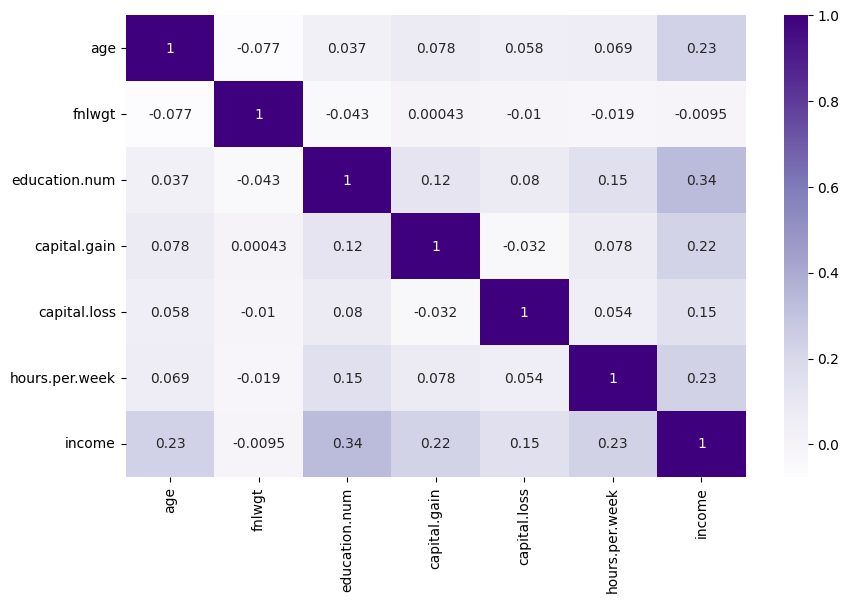

In [232]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Purples')

## Feature Expansion

In [233]:
def ageGrouping(column):
    if column<= 30 & column>=17:
        return "Youth"
    elif column <= 50:
        return "Middle-aged"
    else:
        return "Senior"      

In [234]:
df['ageGroup'] = df['age'].apply(ageGrouping)

In [235]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ageGroup
0,90,Unemployed,77053,HS-grad,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,0,Senior
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,Senior
2,66,Unemployed,186061,Some-college,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,0,Senior
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,Senior
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,Middle-aged


In [236]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ageGroup
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0,Youth
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,Middle-aged
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,Middle-aged
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,Senior
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,Youth


### Data Encoding

In [237]:
educationOrder = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Doctorate','Prof-school']
ageGroupOrder=['Youth','Middle-aged','Senior']

In [238]:
df['education'] = df['education'].astype(str)
df['ageGroup'] = df['ageGroup'].astype(str)

ordinal_encoder = OrdinalEncoder(categories=[educationOrder, ageGroupOrder])
df[['education', 'ageGroup']] = ordinal_encoder.fit_transform(df[['education', 'ageGroup']]).astype(int)

dump(ordinal_encoder, 'ordinal_encoder.joblib')

['ordinal_encoder.joblib']

In [239]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ageGroup
0,90,Unemployed,77053,8,9,Widowed,None,Not-in-family,White,Female,0,4356,40,United-States,0,2
1,82,Private,132870,8,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,2
2,66,Unemployed,186061,9,10,Widowed,None,Unmarried,Black,Female,0,4356,40,United-States,0,2
3,54,Private,140359,3,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,2
4,41,Private,264663,9,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,1


In [240]:
OneHotColumns=['workclass','marital.status','occupation','relationship','race','sex','native.country']

df_encoded = pd.get_dummies(df[OneHotColumns], drop_first=True).astype(int)
df_remaining = df.drop(columns=OneHotColumns)
df = pd.concat([df_remaining, df_encoded], axis=1)

feature_order = df.columns.tolist()
feature_order.remove('income')
dump(feature_order, 'feature_order.joblib')

['feature_order.joblib']

In [241]:
len(feature_order)   

86

In [252]:
file_path = r"my_dataframe.csv"

# Save the DataFrame to CSV with utf-8 encoding
df.to_csv(file_path, index=False, encoding='utf-8')

In [243]:
df.corr()['income'].sort_values(ascending=False)

income                               1.000000
marital.status_Married-civ-spouse    0.444696
education                            0.335951
education.num                        0.335154
age                                  0.234037
                                       ...   
relationship_Unmarried              -0.142857
occupation_Other-service            -0.156348
relationship_Not-in-family          -0.188497
relationship_Own-child              -0.228532
marital.status_Never-married        -0.318440
Name: income, Length: 87, dtype: float64

## Machine Learning

### Data Splitting

In [244]:
X = df.drop(columns=['income'])
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Data Scaling

In [245]:
scaler=StandardScaler()
#scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)     
dump(scaler, 'scaler.joblib')        

['scaler.joblib']

In [ ]:
a = np.array(X_train[0])
Q1 = np.percentile(a, 25)
Q3 = np.percentile(a, 75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
# Find the outliers
outliers = a[(a < lower_bound) | (a > upper_bound)]
print("Outliers:", outliers)
print(len(outliers))
print(len(outliers)/df.shape[0] *100 )

sns.boxplot(a)

###  Handling Imbalance

In [246]:
categorical_features = ['education', 'ageGroup']
smote_nc = SMOTENC(categorical_features=[X.columns.get_loc(col) for col in categorical_features], random_state=42, k_neighbors=3, sampling_strategy=0.5)
X_train_res, y_train_res = smote_nc.fit_resample(X_train, y_train)

resampled_data = pd.DataFrame(X_train_res, columns=X.columns)
resampled_data['income'] = y_train_res
resampled_data.to_csv("adult_income_resampled.csv",index=False)

In [247]:
X_train_res

array([[-0.7729306 ,  0.16436893, -0.41773887, ...,  0.30844355,
        -0.04545754, -0.0198754 ],
       [-1.06651181,  0.01720831, -2.34743167, ...,  0.30844355,
        -0.04545754, -0.0198754 ],
       [-1.36009302,  1.44204351, -0.03180031, ...,  0.30844355,
        -0.04545754, -0.0198754 ],
       ...,
       [ 0.4692807 , -0.91596205, -0.41773887, ...,  0.30844355,
        -0.04545754, -0.0198754 ],
       [ 1.08340611, -0.44843199,  1.51195393, ...,  0.30844355,
        -0.04545754, -0.0198754 ],
       [ 0.05186288, -0.4480363 ,  1.12601537, ..., -3.24208438,
        -0.04545754, -0.0198754 ]])

### Logistic Regression

In [294]:
"""param_grid = {
    'C':np.logspace(-20,0,20),          # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Solvers
    'penalty':['l2','l1']
}
grid_model = GridSearchCV(estimator=LogisticRegression(max_iter=10000), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)"""
#Best Param:L2,liblinear,1.0

log_model=LogisticRegression(C=1.0,solver='liblinear',penalty='l2')
log_model.fit(X_train_res,y_train_res)

y_pred_test=log_model.predict(X_test)
y_pred_train=log_model.predict(X_train_res)

print("Train Accuracy (Logisitc):", accuracy_score(y_train_res, y_pred_train))
print("Test Accuracy (Logistic):", accuracy_score(y_test, y_pred_test))

# Confusion Matrix, Classification Report, and ROC-AUC Score
confusion_log = confusion_matrix(y_test, y_pred_test )
report_log = classification_report(y_test, y_pred_test)
roc_score_log = roc_auc_score(y_test, y_pred_test)

print("\nConfusion Matrix (Logistic):\n", confusion_log)
print("\nClassification Report (Logistic):\n\n", report_log)
print("\nROC-AUC Score (Logistic):", roc_score_log)

dump(log_model,"logistic_model.joblib")

Train Accuracy (Logisitc): 0.8303537027047854
Test Accuracy (Logistic): 0.8425632101545706

Confusion Matrix (Logistic):
 [[6573  844]
 [ 694 1658]]

Classification Report (Logistic):

               precision    recall  f1-score   support

           0       0.90      0.89      0.90      7417
           1       0.66      0.70      0.68      2352

    accuracy                           0.84      9769
   macro avg       0.78      0.80      0.79      9769
weighted avg       0.85      0.84      0.84      9769


ROC-AUC Score (Logistic): 0.795569667128008


['logistic_model.joblib']

### KNN

In [ ]:
test_accuracy = []
train_accuracy = []
Gap= []
for d in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(X_train_res, y_train_res)

    y_pred_train = model.predict(X_train_res)
    y_pred_test = model.predict(X_test)
    
   
    train_accuracy.append(accuracy_score(y_train_res, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))
    Gap.append(accuracy_score(y_train_res, y_pred_train) - accuracy_score(y_test, y_pred_test) )
    
best_min = min(Gap)
best_k = Gap.index(best_min)+1
print(best_k)

Bets k:26

In [295]:
knn_model=KNeighborsClassifier(n_neighbors=26)

knn_model.fit(X_train_res,y_train_res)

y_pred_test=knn_model.predict(X_test)
y_pred_train=knn_model.predict(X_train_res)

print("Train Accuracy (KNN):", accuracy_score(y_train_res, y_pred_train))
print("Test Accuracy (KNN):", accuracy_score(y_test, y_pred_test))

confusion_KNN = confusion_matrix(y_test, y_pred_test )
report_KNN = classification_report(y_test, y_pred_test)
roc_score_KNN = roc_auc_score(y_test, y_pred_test)

print("\nConfusion Matrix (KNN):\n", confusion_KNN)
print("\nClassification Report (KNN):\n\n", report_KNN)
print("\nROC-AUC Score (KNN):", roc_score_KNN)

dump(knn_model,"knn_model.joblib")

Train Accuracy (KNN): 0.8259998458811744
Test Accuracy (KNN): 0.8235233903163067

Confusion Matrix (KNN):
 [[6467  950]
 [ 774 1578]]

Classification Report (KNN):

               precision    recall  f1-score   support

           0       0.89      0.87      0.88      7417
           1       0.62      0.67      0.65      2352

    accuracy                           0.82      9769
   macro avg       0.76      0.77      0.76      9769
weighted avg       0.83      0.82      0.83      9769


ROC-AUC Score (KNN): 0.7714171181483245


['knn_model.joblib']

### Decision Tree

In [ ]:

"""param_grid = {
    'max_depth': [None, 10, 20, 30,40],
    'min_samples_split': [2,5,8,10,13,15,19],
    'min_samples_leaf': [1,2,3,4,5,6,7,8],
    'criterion': ['gini', 'entropy','log_loss']  # Criterion to measure the quality of a split
}
grid_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1,verbose=1)"""
#Best Params:criterion='entropy',max_depth=20,min_samples_split=19,min_samples_leaf=2

DT_model=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=19,min_samples_leaf=2)
DT_model.fit(X_train_res,y_train_res)

y_pred_test=DT_model.predict(X_test)
y_pred_train=DT_model.predict(X_train_res)

print("Train Accuracy (DT):", accuracy_score(y_train_res, y_pred_train))
print("Test Accuracy (DT):", accuracy_score(y_test, y_pred_test))

confusion_DT = confusion_matrix(y_test, y_pred_test )
report_DT = classification_report(y_test, y_pred_test)
roc_score_DT = roc_auc_score(y_test, y_pred_test)

print("\nConfusion Matrix (DT):\n", confusion_DT)
print("\nClassification Report (DT):\n\n", report_DT)
print("\nROC-AUC Score (DT):", roc_score_DT)
dump(DT_model,'DT_model.joblib')

Train Accuracy (DT): 0.8503120906218694
Test Accuracy (DT): 0.8479885351622479

Confusion Matrix (DT):
 [[6804  613]
 [ 872 1480]]

Classification Report (DT):

               precision    recall  f1-score   support

           0       0.89      0.92      0.90      7417
           1       0.71      0.63      0.67      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769


ROC-AUC Score (DT): 0.7733018649012793


['DT_model.joblib']

### Support Vector Machine

In [40]:
'''param_grid = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [0.1,1,10,100,1000],
    'gamma': ['scale', 'auto']  
}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose = 1)'''

svm=SVC(kernel='rbf',C=0.1,gamma='scale')

svm.fit(X_train_res, y_train_res)
y_pred_test=svm.predict(X_test)
y_pred_train=svm.predict(X_train_res)

print("Train Accuracy (SVM):", accuracy_score(y_train_res, y_pred_train))
print("Test Accuracy (SVM):", accuracy_score(y_test, y_pred_test))

confusion_SVM = confusion_matrix(y_test, y_pred_test )
report_SVM = classification_report(y_test, y_pred_test)
roc_score_SVM = roc_auc_score(y_test, y_pred_test)

print("\nConfusion Matrix (SVM):\n", confusion_SVM)
print("\nClassification Report (SVM):\n\n", report_SVM)
print("\nROC-AUC Score (SVM):", roc_score_SVM)

dump(svm,'SVM.joblib')

Train Accuracy (SVM): 0.819565384911767
Test Accuracy (SVM): 0.8362166035418159

Confusion Matrix (SVM):
 [[6629  788]
 [ 812 1540]]

Classification Report (SVM):

               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7417
           1       0.66      0.65      0.66      2352

    accuracy                           0.84      9769
   macro avg       0.78      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769


ROC-AUC Score (SVM): 0.7742597443453585


['SVM.joblib']

### Ada Boost

In [251]:
"""param_grid_adaboost = {
    'n_estimators': list(range(100,200)),  
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  
}
adaboost_model = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=param_grid_adaboost,cv=5,scoring='accuracy',n_jobs=-1)"""

adaboost_model=AdaBoostClassifier(learning_rate=1,n_estimators=150)
adaboost_model.fit(X_train_res, y_train_res)

y_pred_test_adaboost = adaboost_model.predict(X_test)
y_pred_train_adaboost = adaboost_model.predict(X_train_res)

print("Train Accuracy (AdaBoost):", accuracy_score(y_train_res, y_pred_train_adaboost))
print("Test Accuracy (AdaBoost):", accuracy_score(y_test, y_pred_test_adaboost))

confusion_ada = confusion_matrix(y_test, y_pred_test_adaboost)
report_ada = classification_report(y_test, y_pred_test_adaboost)
roc_score_ada = roc_auc_score(y_test, y_pred_test_adaboost)

print("\nConfusion Matrix (AdaBoost):\n", confusion_ada)
print("\nClassification Report (AdaBoost):\n", report_ada)
print("\nROC-AUC Score (AdaBoost):", roc_score_ada)
dump(adaboost_model,'adaboost_model.joblib')

Train Accuracy (AdaBoost): 0.8574015566001387
Test Accuracy (AdaBoost): 0.8523902139420616

Confusion Matrix (AdaBoost):
 [[6661  756]
 [ 686 1666]]

Classification Report (AdaBoost):
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7417
           1       0.69      0.71      0.70      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.80      0.80      9769
weighted avg       0.85      0.85      0.85      9769


ROC-AUC Score (AdaBoost): 0.8032026650487619


['adaboost_model.joblib']

In [44]:
adaboost_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 150}

In [46]:
from lightgbm import LGBMClassifier

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'feature_fraction': [0.8, 0.9, 1.0]
}

lgb_model = GridSearchCV(LGBMClassifier(objective='binary', boosting_type='gbdt'), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


lgb_model.fit(X_train_res, y_train_res)


# Make predictions with the best model
y_pred_train_lgb = lgb_model.predict(X_train_res)
y_pred_test_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("Train Accuracy (LightGBM):", accuracy_score(y_train_res, y_pred_train_lgb))
print("Test Accuracy (LightGBM):", accuracy_score(y_test, y_pred_test_lgb))

confusion_lgb = confusion_matrix(y_test, y_pred_test_lgb)
report_lgb = classification_report(y_test, y_pred_test_lgb)
roc_score_lgb = roc_auc_score(y_test, y_pred_test_lgb)

print("\nConfusion Matrix (LightGBM):\n", confusion_lgb)
print("\nClassification Report (LightGBM):\n\n", report_lgb)
print("\nROC-AUC Score (LightGBM):", roc_score_lgb)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Number of positive: 8651, number of negative: 17303
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2053
[LightGBM] [Info] Number of data points in the train set: 25954, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333320 -> initscore=-0.693205
[LightGBM] [Info] Start training from score -0.693205
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM

In [47]:
lgb_model.best_params_

{'feature_fraction': 0.8,
 'learning_rate': 0.05,
 'n_estimators': 200,
 'num_leaves': 70}

## EDA

<Axes: xlabel='age', ylabel='Density'>

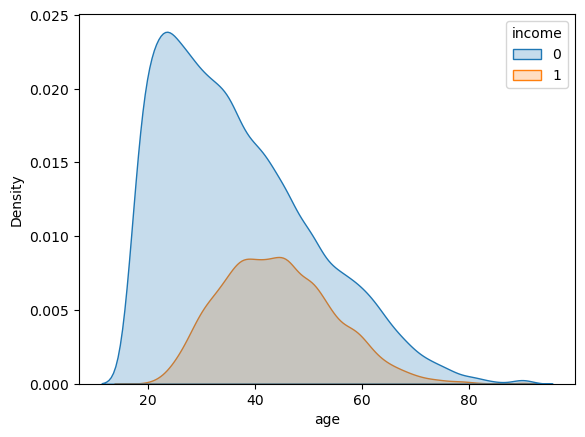

In [ ]:
sns.kdeplot(x='age',data=df,hue='income',fill=True)

<Axes: xlabel='education.num', ylabel='count'>

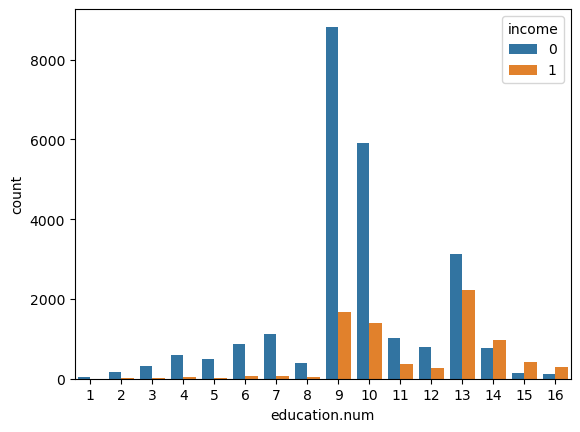

In [ ]:
sns.countplot(data=df,x='education.num',hue='income')

<Axes: xlabel='capital.loss', ylabel='age'>

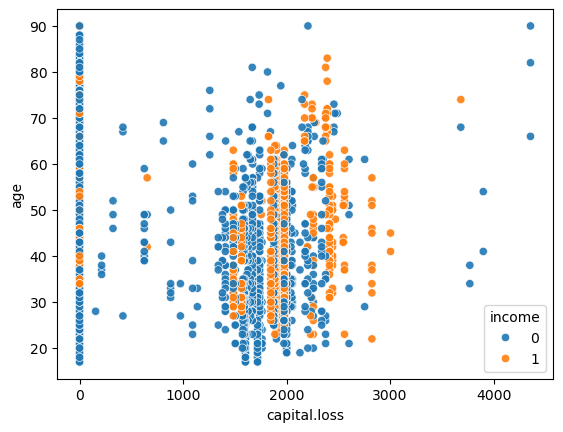

In [ ]:
sns.scatterplot(x='capital.loss',y='age',data=df,hue='income',alpha=0.9)

## GUI

In [248]:
df_input_encoded=0

In [249]:
def model_load(model_name):
    model = load(model_name+'.joblib')
    y_pred_test = model.predict(X_test)
    
    confusion = confusion_matrix(y_test, y_pred_test)
    report = classification_report(y_test, y_pred_test)
    ROCscore = roc_auc_score(y_test, y_pred_test)
    
    return confusion, report, ROCscore
def ageGrouping(column):
    if 17 <= column <= 30:
        return "Youth"
    elif column <= 50:
        return "Middle-aged"
    else:
        return "Senior" 
    
def handleOutliers(column):
    a = df[column]
    Q1 = np.percentile(a, 25)
    Q3 = np.percentile(a, 75)
    IQR = Q3 - Q1

    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound,upper_bound

def prepare_input_data(input_data):

    # Convert input to dataframe
    df_input = pd.DataFrame([input_data])

    lowerbound,upperbound = handleOutliers('age')
    df_input['age']=np.clip(df_input['age'],lowerbound,upperbound)
    
    # Load saved encoders
    ordinal_encoder = load('ordinal_encoder.joblib')
    feature_order = load('feature_order.joblib')

    df_input['ageGroup'] = df_input['age'].apply(ageGrouping)
    # Apply ordinal encoding
    df_input[['education', 'ageGroup']] = ordinal_encoder.transform(df_input[['education', 'ageGroup']]).astype(int)
    
    # Apply one-hot encoding using pd.get_dummies
    OneHotColumns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
    df_input_encoded = pd.get_dummies(df_input, columns=OneHotColumns, drop_first=True).astype(int)
    
    # Ensure columns are in the same order as training data
    df_input_encoded = df_input_encoded.reindex(columns=feature_order, fill_value=0)
    
    return df_input_encoded,feature_order


In [250]:
FILE_PATH = r"my_dataframe.csv"
# 1. Dataset Loading
def load_dataset(file_path):
    global df, X_train, y_train, feature_columns
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        return True
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return False

# 2. Model Selection
def load_model(model_name):
    if model_name == "Logistic Regression":
        model = load('logistic_model.joblib')
    elif model_name == "Decision Tree":
        model = load('DT_model.joblib')
    elif model_name == "KNN":
        model = load('knn_model.joblib')
    elif model_name == "SVM":
        model = load('SVM.joblib')
    elif model_name == "Ada Boost":
        model = load('adaboost_model.joblib')
    return model

# 3. Prediction with Model
def predict_with_loaded_model(model_name, user_input_data):
    try:
        model = load_model(model_name)  # Load the trained model
        # Align user input data with training data features
        user_input_data=user_input_data.to_numpy()
        user_input_data=scaler.transform(user_input_data)
        # Make prediction
        prediction = model.predict(user_input_data)
        return prediction
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Dataset Loading Window
def dataset_loader_window():
    layout = [
        [sg.Text("Load Your Dataset", font=("Helvetica", 14))],
        [sg.Input(default_text=r"my_dataframe.csv", key="-FILE-", size=(70, 1))],
        [sg.FileBrowse(file_types=(("CSV Files", "*.csv"),))],
        [sg.Button("Load Dataset"), sg.Button("Exit")]
    ]
    return sg.Window("Load Dataset", layout, finalize=True, resizable=True)

# Model Selection Window
def model_selection_window():
    layout = [
        [sg.Text("Select a Model", font=("Helvetica", 14))],
        [sg.Combo(["Logistic Regression", "KNN", "Decision Tree", "SVM","Ada Boost"], key="-MODEL-", size=(20, 1))],
        [sg.Button("Train Model"), sg.Button("Predict"), sg.Button("Back")],
        [sg.Text("Results:", font=("Helvetica", 12))],
        [sg.Multiline(size=(70, 20), key="-RESULTS-", disabled=True)]  # Placeholder for displaying results
    ]
    return sg.Window("Model Selection", layout, finalize=True)

# Prediction Input Window
def prediction_input_window():
    layout = [
        [sg.Text("Enter feature values for prediction:")],
        [sg.Text("Age:"), sg.InputText(key="age")],
        [sg.Text("Workclass:"), sg.InputText(key="workclass")],
        [sg.Text("Fnlwgt:"), sg.InputText(key="fnlwgt")],
        [sg.Text("Education:"), sg.InputText(key="education")],
        [sg.Text("Education Number:"), sg.InputText(key="education.num")],
        [sg.Text("Marital Status:"), sg.InputText(key="marital.status")],
        [sg.Text("Occupation:"), sg.InputText(key="occupation")],
        [sg.Text("Relationship:"), sg.InputText(key="relationship")],
        [sg.Text("Race:"), sg.InputText(key="race")],
        [sg.Text("Sex:"), sg.InputText(key="sex")],
        [sg.Text("Capital Gain:"), sg.InputText(key="capital.gain")],
        [sg.Text("Capital Loss:"), sg.InputText(key="capital.loss")],
        [sg.Text("Hours per Week:"), sg.InputText(key="hours.per.week")],
        [sg.Text("Native Country:"), sg.InputText(key="native.country")],
        [sg.Button("Predict"), sg.Button("Back")]
    ]
    return sg.Window("Prediction Input", layout, finalize=True)

# Main Event Loop
def main():
    window1 = dataset_loader_window()
    window2 = None
    window3 = None

    while True:
        window, event, values = sg.read_all_windows()

        if event == sg.WINDOW_CLOSED or event == "Exit":
            if window:
                window.close()
            if window == window1:
                window1 = None
                break
            elif window == window2:
                window2 = None
            elif window == window3:
                window3 = None

        # Dataset Loader logic
        if window == window1:
            if event == "Load Dataset":
                file_path = r"my_dataframe.csv"
                if load_dataset(file_path):
                    sg.popup("Dataset loaded successfully!")
                    window1.close()
                    window1 = None
                    window2 = model_selection_window()  # Show model selection window
                else:
                    sg.popup_error("Failed to load dataset!")

        # Model Selection logic
        if window == window2:
            if event == "Train Model":
                selected_model = values["-MODEL-"]
                if not selected_model:
                    sg.popup_error("Please select a model!")
                else:
                    if selected_model == "Logistic Regression":
                        confusion, class_report, accuracy = model_load('logistic_model')
                        results_text = (
                            f"Confusion Matrix:\n{confusion}\n\n"
                            f"Classification Report:\n{class_report}\n\n"
                            f"ROC Score: {accuracy}\n"
                        )
                    elif selected_model == "KNN":
                        confusionknn, class_reportknn, ROCscoreknn = model_load('knn_model')
                        results_text = (
                            f"Confusion Matrix:\n{confusionknn}\n\n"
                            f"Classification Report:\n{class_reportknn}\n\n"
                            f"ROC Score: {ROCscoreknn}\n"
                        )
                    elif selected_model == "Decision Tree":
                        confusiontree, class_reporttree, ROCscoretree = model_load('DT_model')
                        results_text = (
                            f"Confusion Matrix:\n{confusiontree}\n\n"
                            f"Classification Report:\n{class_reporttree}\n\n"
                            f"ROC Score: {ROCscoretree}\n"
                        )
                    elif selected_model == "SVM":
                        confusionSVM, class_reportSVM, ROCscoreSVM = model_load('SVM')
                        results_text = (
                            f"Confusion Matrix:\n{confusionSVM}\n\n"
                            f"Classification Report:\n{class_reportSVM}\n\n"
                            f"ROC Score: {ROCscoreSVM}\n"
                        )

                    window2["-RESULTS-"].update(results_text)  # Display the results

            elif event == "Back":
                window2.close()
                window2 = None
                window1 = dataset_loader_window()

            elif event == "Predict":
                selected_model = values.get("-MODEL-")
                if not selected_model:
                    sg.popup_error("Please select a model first!")
                else:
                    window2.hide()
                    window3 = prediction_input_window()

        # Prediction Input logic
        if window == window3:
            if event == "Back":
                window3.close()
                window3 = None
                window2.un_hide()

            elif event == "Predict":
                try:
                    # Collect user input data from the form
                    user_input_data = {
                        'age': float(values["age"]),
                        'workclass': values["workclass"],
                        'fnlwgt': float(values["fnlwgt"]),
                        'education': values["education"],
                        'education.num': int(values["education.num"]),
                        'marital.status': values["marital.status"],
                        'occupation': values["occupation"],
                        'relationship': values["relationship"],
                        'race': values["race"],
                        'sex': values["sex"],
                        'capital.gain': float(values["capital.gain"]),
                        'capital.loss': float(values["capital.loss"]),
                        'hours.per.week': float(values["hours.per.week"]),
                        'native.country': values["native.country"]
                    }

                    # Convert input data to a DataFrame
                    input_df,feature_order = prepare_input_data(user_input_data)
                    print(input_df.columns)   

                

                    prediction = predict_with_loaded_model(selected_model, input_df)

                    if prediction is not None:
                        if prediction[0]==1:
                            sg.popup(f"Predicted Income: >50K")
                        if prediction[0]==0:
                            sg.popup(f"Predicted Income: <=50K")
                    else:
                        sg.popup_error("Prediction failed. Please check your inputs and try again.")

                except Exception as e:
                    sg.popup_error(f"Error during prediction: {e}")

if __name__ == "__main__":
  main()

Dataset loaded successfully!
Index(['age', 'fnlwgt', 'education', 'education.num', 'capital.gain',
       'capital.loss', 'hours.per.week', 'ageGroup', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Unemployed', 'workclass_Without-pay',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_None', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support',

KeyboardInterrupt: 

In [178]:
print(feature_order)

['age', 'fnlwgt', 'education', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'ageGroup', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unemployed', 'workclass_Without-pay', 'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse', 'marital.status_Married-spouse-absent', 'marital.status_Never-married', 'marital.status_Separated', 'marital.status_Widowed', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_None', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'relationship_Not-in-family', 'relationship_Other-relative', 'relationship_Own-child', 'relationship_

In [179]:
len(feature_order)

86